In [1]:
import librosa

In [8]:
import soundfile as sf

In [14]:
import os

In [27]:
import librosa
import os
import soundfile as sf

def resample_audio(input_path, output_path, target_sr=44100):
    # Load the audio file
    audio, sr = librosa.load(input_path, sr=None)
    
    # Resample the audio to the target sampling rate
    if sr != target_sr:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    
    # Save the resampled audio
    sf.write(output_path, audio, target_sr)

# Example: Resampling all audio files in a directory
input_directory = 'D:/Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Raw/Zastava M92'
output_directory = 'D:/Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized/Zastava M92'

os.makedirs(output_directory, exist_ok=True)

print("Processing...")

for filename in os.listdir(input_directory):
    print(f"{filename} visited.")
    if filename.endswith('.wav'):
        print(f"{filename} successfully normalized")
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(output_directory, filename)
        resample_audio(input_path, output_path)
        
print("Successfully completed")


Processing...
9 (1).wav visited.
9 (1).wav successfully normalized
9 (10).wav visited.
9 (10).wav successfully normalized
9 (11).wav visited.
9 (11).wav successfully normalized
9 (12).wav visited.
9 (12).wav successfully normalized
9 (13).wav visited.
9 (13).wav successfully normalized
9 (14).wav visited.
9 (14).wav successfully normalized
9 (15).wav visited.
9 (15).wav successfully normalized
9 (16).wav visited.
9 (16).wav successfully normalized
9 (17).wav visited.
9 (17).wav successfully normalized
9 (18).wav visited.
9 (18).wav successfully normalized
9 (19).wav visited.
9 (19).wav successfully normalized
9 (2).wav visited.
9 (2).wav successfully normalized
9 (20).wav visited.
9 (20).wav successfully normalized
9 (21).wav visited.
9 (21).wav successfully normalized
9 (22).wav visited.
9 (22).wav successfully normalized
9 (23).wav visited.
9 (23).wav successfully normalized
9 (24).wav visited.
9 (24).wav successfully normalized
9 (25).wav visited.
9 (25).wav successfully normalized


In [43]:
import librosa
import os

def check_sampling_rate(directory, expected_sr=44100):
    gun_name = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']
    
    for i in gun_name:
        Dir = os.path.join(directory, i)  # Correct directory for each gun
        if not os.path.exists(Dir):
            print(f"Directory {Dir} does not exist.")
            continue
        
        consistent = True  # Flag to track consistency
        for filename in os.listdir(Dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(Dir, filename)
                audio, sr = librosa.load(file_path, sr=None)
                
                if sr != expected_sr:
                    consistent = False
                    break  # No need to check further if inconsistency is found
        
        if consistent:
            print(f"All guns of {i} type have consistent sampling rate.")
        else:
            print(f"All guns of {i} type do not have consistent sampling rate.")

# Example: Check the sampling rate for all files in the output directory
output_directory = 'D:/Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized'
check_sampling_rate(output_directory)


All guns of AK-12 type have consistent sampling rate.
All guns of AK-47 type have consistent sampling rate.
All guns of IMI Desert Eagle type have consistent sampling rate.
All guns of M4 type have consistent sampling rate.
All guns of M16 type have consistent sampling rate.
All guns of M249 type have consistent sampling rate.
All guns of MG-42 type have consistent sampling rate.
All guns of MP5 type have consistent sampling rate.
All guns of Zastava M92 type have consistent sampling rate.


In [ ]:
#Creating spectrogram for normalised sampling rates, but without normalised volume levels:

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def create_spectrogram(file_path, output_dir, gun_name):
    # Load audio file
    y, sr = librosa.load(file_path, sr=44100)

    # Create the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {gun_name}')
    plt.tight_layout()

    # Save the spectrogram as an image
    file_name = os.path.basename(file_path).replace('.wav', '.png')
    output_path = os.path.join(output_dir, f"{gun_name}_{file_name}")
    plt.savefig(output_path)
    plt.close()

def process_directory(input_dir, output_dir):
    gun_names = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']
    
    for gun_name in gun_names:
        gun_dir = os.path.join(input_dir, gun_name)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        for filename in os.listdir(gun_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(gun_dir, filename)
                create_spectrogram(file_path, output_dir, gun_name)

# Example: Process the gunshot audio files
input_directory = 'D:/Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized'
output_directory = 'D:/Gunshot_Audio_Dataset/Gunshot_Spectrograms'
process_directory(input_directory, output_directory)


In [ ]:
#Creating spectrograms for normalised sampling rates and normalised volume levels also:

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def normalize_audio(y):
    """Normalize the audio to a range of -1 to 1."""
    return y / np.max(np.abs(y))

def create_spectrogram(file_path, output_dir, gun_name):
    # Load the audio file with a sampling rate of 44100 Hz
    y, sr = librosa.load(file_path, sr=44100)
    
    # Normalize the audio volume
    y_normalized = normalize_audio(y)
    
    # Create the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y_normalized, sr=sr)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

    # Plot and save the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {gun_name}')
    plt.tight_layout()

    # Save the spectrogram as an image
    file_name = os.path.basename(file_path).replace('.wav', '.png')
    output_path = os.path.join(output_dir, f"{gun_name}_{file_name}")
    plt.savefig(output_path)
    plt.close()

def process_directory(input_dir, output_dir):
    gun_names = ['AK-12', 'AK-47', 'IMI Desert Eagle', 'M4', 'M16', 'M249', 'MG-42', 'MP5', 'Zastava M92']
    
    for gun_name in gun_names:
        gun_dir = os.path.join(input_dir, gun_name)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        for filename in os.listdir(gun_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(gun_dir, filename)
                create_spectrogram(file_path, output_dir, gun_name)

# Example: Process the gunshot audio files
input_directory = 'D:/Gunshot_Audio_Dataset/Gunshot_Audio_Dataset_Sampling_Normalized'
output_directory = 'D:/Gunshot_Audio_Dataset/Gunshot Spectrograms/Sampling and Volume Normalized'
process_directory(input_directory, output_directory)


In [3]:
#load the spectrogram images and their corresponding labels based on the file names.
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

def load_data(data_dir):
    images = []
    labels = []
    
    gun_types = {
        'AK-12': 'AK-12',
        'AK-47': 'AK-47',
        'IMI Desert Eagle': 'IMI Desert Eagle',
        'M4': 'M4',
        'M16': 'M16',
        'M249': 'M249',
        'MG-42': 'MG-42',
        'MP5': 'MP5',
        'Zastava M92': 'Zastava M92'
    }

    for filename in os.listdir(data_dir):
        if filename.endswith('.png'):
            file_path = os.path.join(data_dir, filename)
            img = image.load_img(file_path, target_size=(128, 128))  # Resize images to 128x128 pixels
            img_array = image.img_to_array(img)
            images.append(img_array)
            
            # Determine the gun type from the filename
            for gun_name in gun_types.keys():
                if gun_name in filename:
                    labels.append(gun_name)
                    break
    
    images = np.array(images, dtype='float32') / 255.0  # Normalize the image data to [0, 1]
    labels = np.array(labels)
    
    # Encode the labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    labels_encoded = to_categorical(labels_encoded)
    
    return images, labels_encoded, label_encoder

data_directory = 'D:/Gunshot_Audio_Dataset/Gunshot Spectrograms/Sampling and Volume Normalized'
images, labels_encoded, label_encoder = load_data(data_directory)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Example: Print the shapes to confirm
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (680, 128, 128, 3)
Test data shape: (171, 128, 128, 3)
Training labels shape: (680, 9)
Test labels shape: (171, 9)


In [6]:
#Build the CNN Model

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    # 1st Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    # 2nd Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 3rd Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(128, activation='relu'),

    # Output Layer with Softmax activation for classification
    layers.Dense(9, activation='softmax')
])

# Summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [7]:
#Compile the Model, We'll use the Adam optimizer and categorical cross-entropy loss, which is suitable for multi-class classification.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
#Training the Model

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test), 
                    batch_size=32)


Epoch 1/20
22/22 [==============================] - 17s 697ms/step - loss: 2.2672 - accuracy: 0.1309 - val_loss: 2.1380 - val_accuracy: 0.2515
Epoch 2/20
22/22 [==============================] - 15s 675ms/step - loss: 2.0226 - accuracy: 0.2279 - val_loss: 1.8140 - val_accuracy: 0.3216
Epoch 3/20
22/22 [==============================] - 15s 692ms/step - loss: 1.7217 - accuracy: 0.3824 - val_loss: 1.6864 - val_accuracy: 0.3918
Epoch 4/20
22/22 [==============================] - 15s 690ms/step - loss: 1.4945 - accuracy: 0.4544 - val_loss: 1.5485 - val_accuracy: 0.4737
Epoch 5/20
22/22 [==============================] - 15s 690ms/step - loss: 1.1100 - accuracy: 0.6191 - val_loss: 1.2462 - val_accuracy: 0.5322
Epoch 6/20
22/22 [==============================] - 15s 692ms/step - loss: 0.7561 - accuracy: 0.7309 - val_loss: 0.8506 - val_accuracy: 0.6959
Epoch 7/20
22/22 [==============================] - 15s 691ms/step - loss: 0.3384 - accuracy: 0.9103 - val_loss: 0.4055 - val_accuracy: 0.8772

In [9]:
#Evaluate the model using test data

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


6/6 - 1s - loss: 0.1390 - accuracy: 0.9708 - 790ms/epoch - 132ms/step

Test accuracy: 0.9708


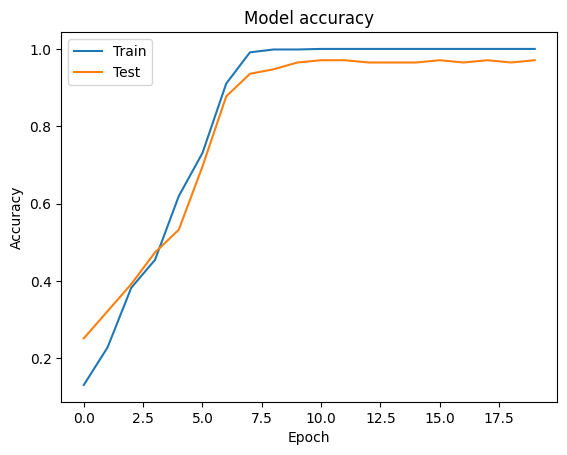

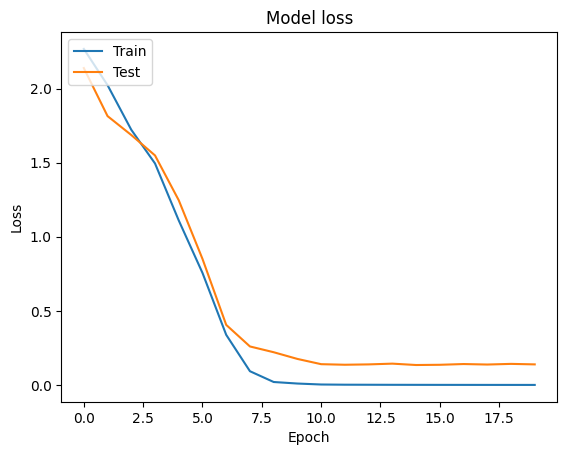

In [10]:
#Plot the Training and Validation Curves

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [12]:
#Save the model

model.save('gunshot_model.keras')  # Save in the native Keras format